### Import useful libraries

In [1]:
import random
from board import Board
from player import Player
from tqdm import trange
from utils import *

### Train the player

In [2]:
me     = 'o'
agent  = 'x'
board  = Board(nrow=3, ncol=3, sign_play=[agent,me])

num_train = 100000
lr = 0.1
lr_red_steps = 10000

order = 1
ord_incr_steps = 2000000

In [3]:
# player with full exploration
player = Player(sign=agent, 
                order=order, ord_incr_steps=ord_incr_steps, 
                lr=lr, lr_red_steps=lr_red_steps)

player.train(board, algorithm='az', num_train=num_train, store_values=False, store_convergence=True)

100%|██████████| 100000/100000 [18:49<00:00, 88.56it/s]


### Plot convergence

In [4]:
import matplotlib
import matplotlib.pyplot as plt

In /home/octave/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/octave/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/octave/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/octave/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/octave/.local/lib/python3.6/site-packages/matplotlib/mpl-data/s

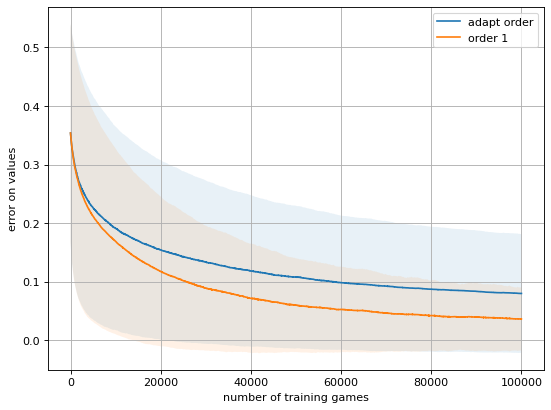

In [8]:
data = np.loadtxt('data/player/' + player.get_name() + '-convergence.txt')
# data = np.loadtxt('data/player/201031-1313-convergence.txt')
data_0 = np.loadtxt('data/player/201026-1617-convergence.txt')
# data_1 = np.loadtxt('data/player/201026-1553-convergence.txt')
x = range(num_train)

transp = 0.1

fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1, 1, 1)

plt.fill_between(x, data[:,0]-data[:,1], data[:,0]+data[:,1], alpha=transp)
plt.plot(x, data[:,0], label='adapt order')

# plt.fill_between(x, data_0[:,0]-data_0[:,1], data_0[:,0]+data_0[:,1], alpha=transp)
# plt.plot(x, data_0[:,0], label='order 0')

plt.fill_between(x, data_1[:,0]-data_1[:,1], data_1[:,0]+data_1[:,1], alpha=transp)
plt.plot(x, data_1[:,0], label='order 1')

plt.legend(loc='upper right')

ax.set(xlabel='number of training games', ylabel='error on values')
ax.grid()

plt.show()

In [ ]:
# load data
data_0 = np.loadtxt('data/player/201026-1617-convergence.txt')
data_1 = np.loadtxt('data/player/201026-1553-convergence.txt')
data_2 = np.loadtxt('data/player/201026-1449-convergence.txt')
data_5 = np.loadtxt('data/player/201026-1740-convergence.txt')
data_10 = np.loadtxt('data/player/201026-1510-convergence.txt')
data = np.loadtxt('data/player/201026-1909-convergence.txt')

x = range(num_train)

In [ ]:
transp = 0.1

fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1, 1, 1)

# plt.fill_between(x, data_0[:,0]-data_0[:,1], data_0[:,0]+data_0[:,1], alpha=transp)
# plt.plot(x, data_0[:,0], label='order 0')

plt.fill_between(x, data_1[:,0]-data_1[:,1], data_1[:,0]+data_1[:,1], alpha=transp)
plt.plot(x, data_1[:,0], label='order 1')

# plt.fill_between(x, data_2[:,0]-data_2[:,1], data_2[:,0]+data_2[:,1], alpha=transp)
# plt.plot(x, data_2[:,0], label='order 1')

plt.fill_between(x, data_5[:,0]-data_5[:,1], data_5[:,0]+data_5[:,1], alpha=transp)
plt.plot(x, data_5[:,0], label='order 5')

plt.fill_between(x, data_10[:,0]-data_10[:,1], data_10[:,0]+data_10[:,1], alpha=transp)
plt.plot(x, data_10[:,0], label='order 10')

# plt.fill_between(x, data[:,0]-data[:,1], data[:,0]+data[:,1], alpha=transp)
# plt.plot(x, data[:,0], label='adapt order')

plt.legend(loc='upper right')

ax.set(xlabel='number of training games', ylabel='error on values',
       title='A higher order slows down convergence')
ax.grid()

fig.savefig("test.png")
plt.show()

### Test if the player learned the optimal strategy

In [ ]:
player.load_args("data/player/201016-2059")
player.playing_mode()

In [ ]:
# number of testing matches
num_test = 1000
# number of matches that finished in a draw
num_draw = 0

for n in trange(num_test):
    # reset board for new game
    board.reset()
    
    if random.random() < 0.5:
        # start in random location
        i = random.choices(range(board.get_nrow()))[0]
        j = random.choices(range(board.get_nrow()))[0]
        board.add(me, row=i, col=j)

    # assume the game will end in a draw
    num_draw += 1
    while not board.is_full():
        # RL agent chooses an action
        action = player.choose_action(board)
        # update board
        board.add(sign=agent, row=action[0], col=action[1])
        # check if RL agent won
        if board.is_won(): 
            num_draw -= 1
            break
        # if nobody won yet, inverse the board
        board.inverse()

print("Finished testing")
print('   number of draws : ', num_draw, " of ", num_test)

### Play against it

In [ ]:
board.reset()

In [ ]:
if board.is_full():
    board.reset()
    
# None or array [row,col]
my_pos = [1,2]
if my_pos:
    board.add(me, row=my_pos[0], col=my_pos[1])

if (not board.is_full()) and (not board.is_won()):
    # player 'x' plays
    board = player.play(board)

board.print()

In [ ]:
board.reset()
board.add(agent, row=0, col=0)
board.add(me, row=1, col=1)

board = player.play(board)

board.print()


### Similar boards converge to similar values

In [ ]:
# do 
print(player.get_value('o---x-ox-'))
print(player.get_value('o-oxx----'))
print(player.get_value('-xo-x---o'))
print(player.get_value('----xxo-o'))

print(player.get_value('ox--x-o--'))
print(player.get_value('---xx-o-o'))
print(player.get_value('--o-x--xo'))
print(player.get_value('o-o-xx---'))

In [ ]:
print(player.get_value('xox-xo-o-'))
print(player.get_value('--xoxo-ox'))
print(player.get_value('-o-ox-xox'))
print(player.get_value('xo-oxox--'))

print(player.get_value('-o--xoxox'))
print(player.get_value('-oxoxo--x'))
print(player.get_value('xoxox--o-'))
print(player.get_value('xo-oxox--'))